In [2]:
#Этот код считает все числа, которые можно записать с помощью только цифр 8 и/или 9(до миллиона)
#Так как максимальное количество цифр в числе — 6 (для чисел до миллиона), нам нужно перебрать все такие комбинации для чисел длиной от 1 до 6.
def count_six_digit_numbers():
    count = 0
    # Перебираем длины чисел от 1 до 6
    for length in range(1, 7):
        # Перебираем все возможные комбинации цифр 8 и 9 длины `length`
        for number in range(2**length):
            # Преобразуем в двоичный вид и заменяем 0 на 8, 1 на 9
            binary_str = bin(number)[2:].zfill(length).replace('0', '8').replace('1', '9')
            count += 1
    return count

r = count_six_digit_numbers()
print(r)


126


In [1]:
#оказалось и так, fascinating: алгоритм Дейкстры можно отнести к области дискретной математики,
#поскольку он тесно связан с теорией графов — одной из ключевых тем дискретной математики.
import heapq

# Функция для алгоритма Дейкстры
def dijkstra(graph, start):
    # Инициализируем расстояния до всех узлов как бесконечные
    distances = {node: float('inf') for node in graph}
    # Расстояние до стартового узла равно 0
    distances[start] = 0
    # Очередь с приоритетом для хранения узлов для обработки
    priority_queue = [(0, start)]

    while priority_queue:
        # Извлекаем узел с минимальным расстоянием
        current_distance, current_node = heapq.heappop(priority_queue)

        # Если текущее расстояние больше известного, продолжаем
        if current_distance > distances[current_node]:
            continue

        # Проходим по всем соседям текущего узла
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # Если найден более короткий путь к соседу
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Функция для поиска ближайшего курьера
def find_nearest_courier(graph, couriers, start_location):
    # Выполняем алгоритм Дейкстры от начального местоположения
    distances = dijkstra(graph, start_location)

    # Ищем ближайшего курьера по минимальному расстоянию
    nearest_courier = None
    min_distance = float('inf')

    for courier in couriers:
        if distances[courier] < min_distance:
            min_distance = distances[courier]
            nearest_courier = courier

    return nearest_courier, min_distance


# Пример графа: узлы (местоположения) и рёбра (расстояния)
graph = {
    'A': {'B': 7, 'D': 5},
    'B': {'A': 7, 'C': 8, 'D': 9, 'E': 7},
    'C': {'B': 8, 'E': 5},
    'D': {'A': 5, 'B': 9, 'E': 15, 'F': 6},
    'E': {'B': 7, 'C': 5, 'D': 15, 'F': 8, 'G': 9},
    'F': {'D': 6, 'E': 8, 'G': 11},
    'G': {'E': 9, 'F': 11}
}

# Список курьеров и их местоположения
couriers = ['C', 'E', 'F']

# Местоположение заказа
order_location = 'A'

# Поиск ближайшего курьера
nearest_courier, distance = find_nearest_courier(graph, couriers, order_location)

print(f'Ближайший курьер: {nearest_courier}, расстояние: {distance}')


Ближайший курьер: F, расстояние: 11


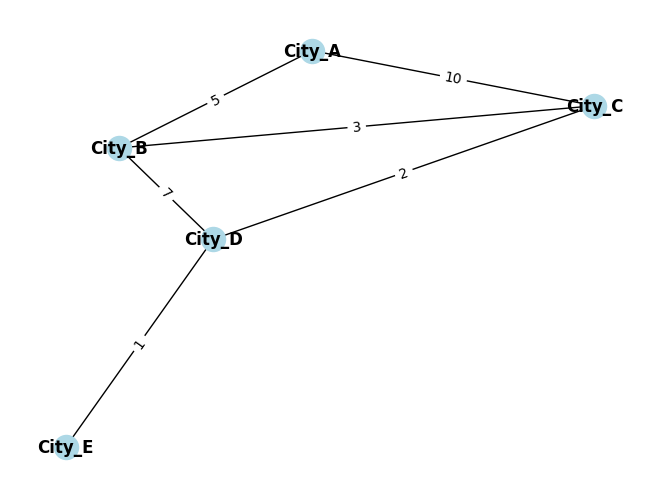

Epoch 1/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1739 - loss: 1.6179   
Epoch 2/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2129 - loss: 1.6069 
Epoch 3/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1780 - loss: 1.5997 
Epoch 4/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2636 - loss: 1.5739 
Epoch 5/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.5629 
Epoch 6/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3526 - loss: 1.5515 
Epoch 7/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2650 - loss: 1.5734 
Epoch 8/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2952 - loss: 1.5432 
Epoch 9/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2923 - loss: 1.5531 
Epoch 10/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1936 - loss: 1.5706     
Epoch 11/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: 1.5326 
Epoch 12/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import networkx as nx
import matplotlib.pyplot as plt

# Инициализация графа (используем теорию графов из дискретной математики)
G = nx.Graph()

# Добавляем вершины (города)
cities = ['City_A', 'City_B', 'City_C', 'City_D', 'City_E']
for city in cities:
    G.add_node(city)

# Добавляем рёбра (пути между городами с весами, представляющими расстояние или время)
G.add_edge('City_A', 'City_B', weight=5)
G.add_edge('City_B', 'City_C', weight=3)
G.add_edge('City_A', 'City_C', weight=10)
G.add_edge('City_C', 'City_D', weight=2)
G.add_edge('City_D', 'City_E', weight=1)
G.add_edge('City_B', 'City_D', weight=7)

# Визуализируем граф
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# Подготовка данных
num_cities = len(cities)
user_preferences = np.random.rand(100, num_cities)  # случайные предпочтения пользователей

# Генерация случайных маршрутов для пользователей
# Чтобы избежать ошибки, выбираем не больше городов, чем их есть (без замены)
routes = np.array([np.random.choice(num_cities, size=num_cities, replace=False) for _ in range(100)])

# Конвертация маршрутов в правильный формат для sparse_categorical_crossentropy
# Мы будем предсказывать первый город маршрута
routes = routes[:, 0]  # Используем первый город как метку

# Нормализация данных
user_preferences = user_preferences / np.max(user_preferences)

# Строим нейросеть
model = models.Sequential([
    layers.InputLayer(input_shape=(num_cities,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_cities, activation='softmax')  # прогнозируем вероятность маршрута через каждый город
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # здесь подходит sparse_categorical_crossentropy, так как метки — целые числа
              metrics=['accuracy'])

# Обучение нейросети
history = model.fit(user_preferences, routes, epochs=400, batch_size=8)

# Предсказание маршрутов
new_user_preferences = np.random.rand(1, num_cities) / np.max(user_preferences)
predicted_route = model.predict(new_user_preferences)

# Оптимальный маршрут по предсказаниям нейросети
best_route = np.argsort(predicted_route[0])[::-1]  # сортируем города по вероятности
recommended_route = [cities[i] for i in best_route]
print("Recommended route for the traveler:", recommended_route)

# Применение дискретной математики: поиск кратчайшего пути (например, для расстояний)
# Используем алгоритм Дейкстры для поиска кратчайшего маршрута
start_city = 'City_A'
end_city = 'City_E'
shortest_path = nx.dijkstra_path(G, start_city, end_city, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, start_city, end_city, weight='weight')

print(f"Shortest path from {start_city} to {end_city}: {shortest_path}")
print(f"Length of the shortest path: {shortest_path_length}")
